## Bank Marketing Dataset

Today we will look at a bank marketinng dataset. We want to try to find a model that will predict if a client is likely to respond to our marketting campaigns so that we can target our efforts.

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

https://archive.ics.uci.edu/dataset/222/bank+marketing

Input variables:
   #### bank client data:
  1. - age (numeric)
  2. - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar", "self-employed","retired","technician","services")
  3. - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  4. - education (categorical: "unknown","secondary","primary","tertiary")
  5. - default: has credit in default? (binary: "yes","no")
  6. - balance: average yearly balance, in euros (numeric)
  7. - housing: has housing loan? (binary: "yes","no")
  8. - loan: has personal loan? (binary: "yes","no")
   
   #### related with the last contact of the current campaign:
  9. - contact: contact communication type (categorical: "unknown","telephone","cellular")
  10. - day: last contact day of the month (numeric)
  11. - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12. - duration: last contact duration, in seconds (numeric)
   #### other attributes:
  13. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14. - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15. - previous: number of contacts performed before this campaign and for this client (numeric)
  16. - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  #### Output variable (desired target):
  17. - y - has the client subscribed a term deposit? (binary: "yes","no")

  Let's load our libraries.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# Load the CSV file into a DataFrame
data = pd.read_csv('6_bank.csv', sep=";")

# Display the first few rows to get an initial understanding
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Use the sum of isnull() to check for null values:

In [40]:
# check for null values
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


We are going to need to treat our categorical and continous data seperately. Let's idenfiy these columns with describe, info, then seperate the columns by selecting the data typpe and converting to a list eg.
```
select_dtypes(include='int64').columns.tolist()
```

In [41]:
# check for data types
data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [42]:
# select the categorical and numerical columns

In [43]:
continuous_cols = data.select_dtypes(include="int64").columns.tolist()
continuous_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [44]:
categorical_cols = data.select_dtypes(include="object").columns.tolist()
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

First let's use a Categogorical Naive Bayes classifer with our categorical columns. We will need to convert them first. We can make use of LabelEncoder. We can combine the fit and transform steps by using fit_transform and looping through our columns:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [45]:
# use the label encoder to convert the categorical columns to numerical values
le = LabelEncoder()
for col in categorical_cols:
  data[col] = le.fit_transform(data[col])

data[categorical_cols].head()



,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,10,1,0,0,0,0,0,10,3,0
1,7,1,1,0,1,1,0,8,0,0
2,4,2,2,0,1,0,0,0,0,0
3,4,1,2,0,1,1,2,6,3,0
4,1,1,1,0,1,0,2,8,3,0


In [46]:
# Check your data

Setup our target variable (remember to not include it in the training data) and split our data. Split all of the data together, both numerical and categorical.


In [47]:
y = data['y']
X = data.drop("y", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [48]:
categorical_cols = categorical_cols[:-1]

In [49]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

Finally lets apply and asses our classifier:

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html

In [50]:
CNB = CategoricalNB()
CNB.fit(X_train[categorical_cols], y_train)
y_pred = CNB.predict(X_test[categorical_cols])

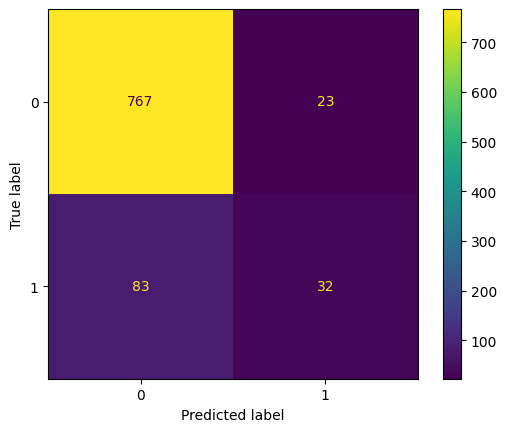

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [52]:
print(accuracy_score(y_test, y_pred))

0.8828729281767956


Use the Gaussian Naive Bayes classifier and compare it to the categorical classifer.

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [53]:
GNB = GaussianNB()
GNB.fit(X_train[continuous_cols], y_train)
y_pred = GNB.predict(X_test[continuous_cols])

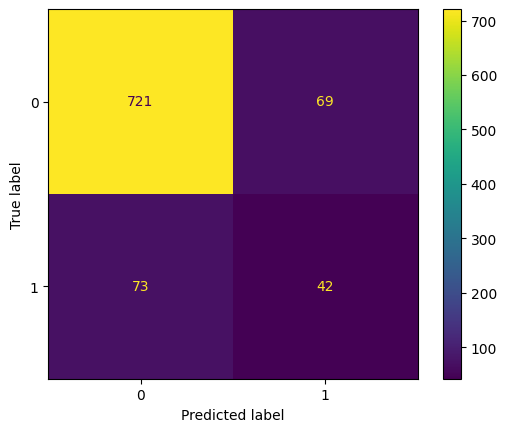

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


Let's compare their prediction distributions:

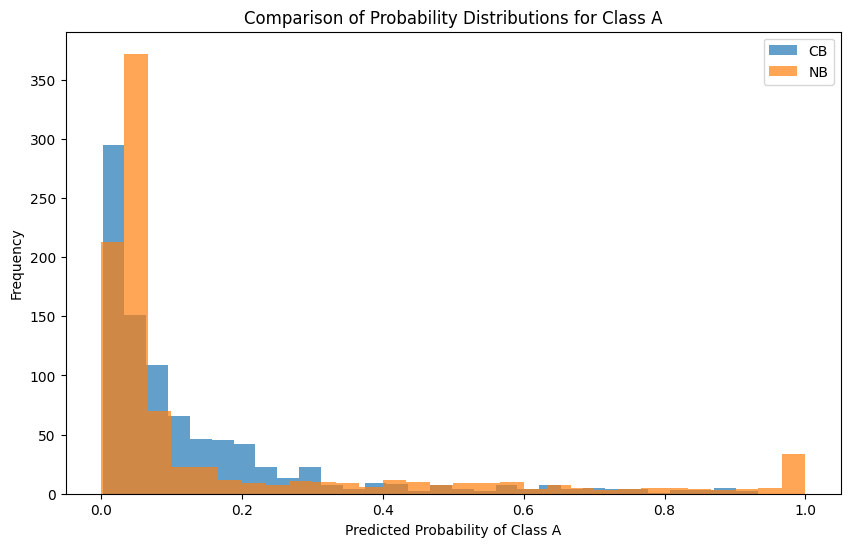

In [55]:
# Predict probabilities for class 'A' (class '1' in this case)
prob_a_CB = CNB.predict_proba(X_test[categorical_cols])[:,1]# Probabilities from categorical Naive Bayes
prob_a_NB = GNB.predict_proba(X_test[continuous_cols])[:,1]  # Probabilities from gaussian Naive Bayes

# Plot the distributions of predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(prob_a_CB, bins=30, alpha=0.7, label='CB')
plt.hist(prob_a_NB, bins=30, alpha=0.7, label='NB')
plt.title('Comparison of Probability Distributions for Class A')
plt.xlabel('Predicted Probability of Class A')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Ok let's say we want to to identify any customer that is likely to be open to marketing using all the data available. Combine the classifiers to create and compare two different ensemble classifiers:
* One that combines the probabilities from each classifier.
* A classificaiton model that tries to maximise recall by taking the predicition whenever either model is positive.


In [56]:
combined_prob = (prob_a_CB + prob_a_NB) /2
y_predict_combined = (combined_prob > 0.5).astype(int)

In [57]:
y_predict_combined

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

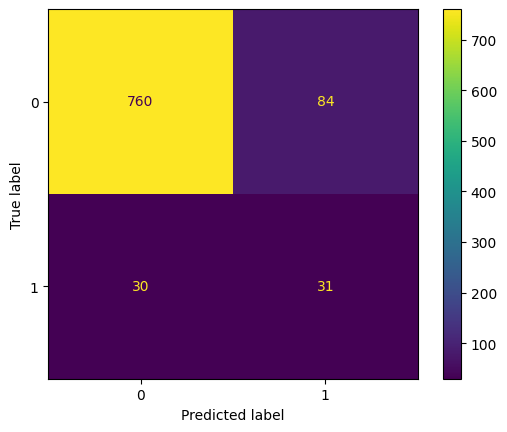

In [58]:
ConfusionMatrixDisplay.from_predictions(y_predict_combined, y_test)

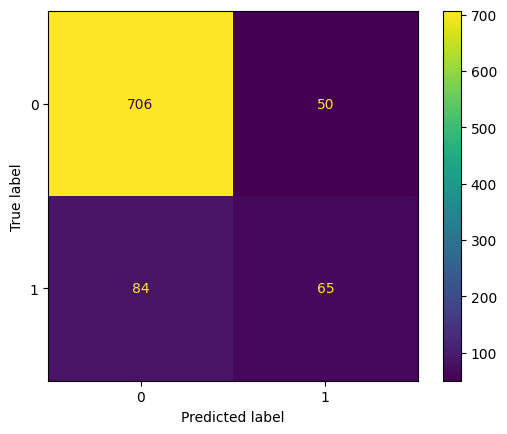

In [59]:
prob_max = np.maximum(prob_a_CB, prob_a_NB)
y_predict_max = (prob_max > 0.5).astype(int)
ConfusionMatrixDisplay.from_predictions(y_predict_max, y_test)

#### Exercises

Fit and compare to our existing models to find the best classifier on this dataset:
* KNN
* LogisticRegression
* Discriminant Analysis (LDA, QDA)

Remember to consider how to setup the data for these models! You may wish to consult the documentation for the new models below:

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html